In [38]:
import matplotlib.pyplot as plt
import numpy as np
# import pylab as pl
import pandas as pd

In [39]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [40]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [41]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [42]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


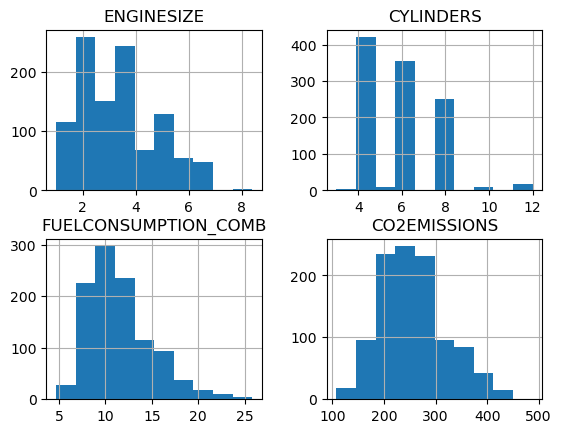

In [43]:
cdf.hist()
plt.show()

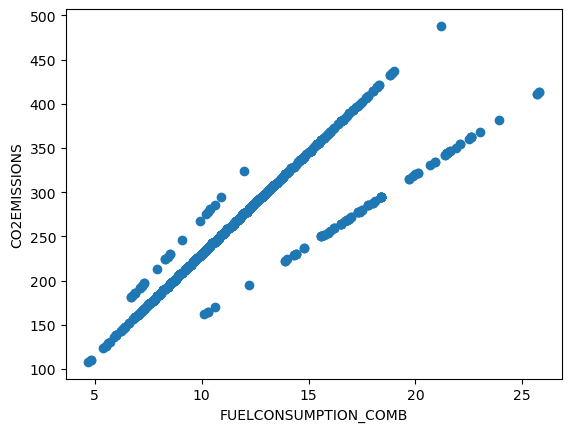

In [44]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

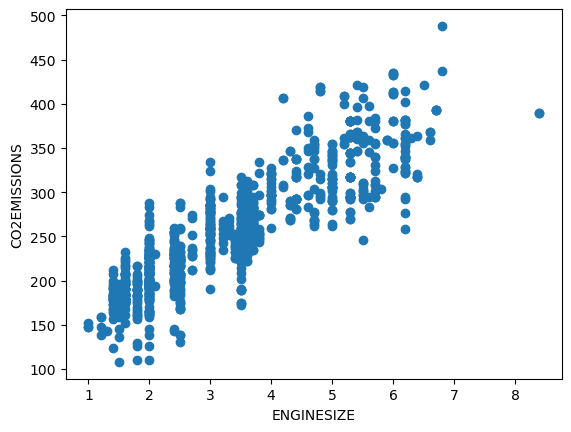

In [45]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

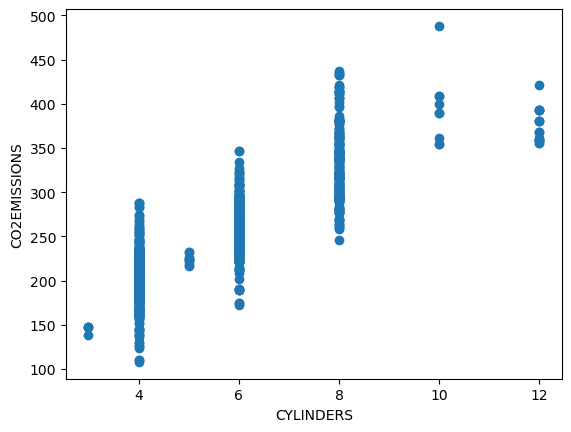

In [46]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [47]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

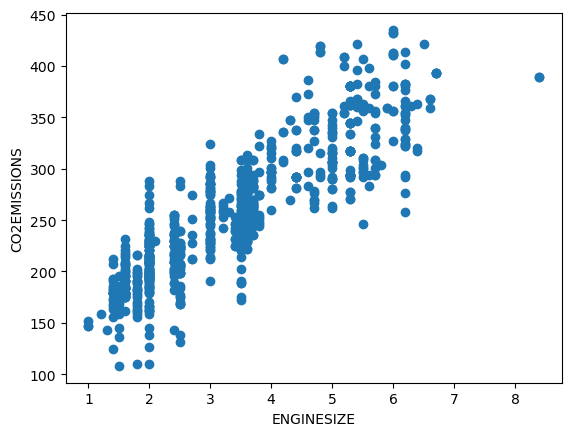

In [48]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [49]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
# I am using asanarray because they donot create a new array if the existing data is in the desired format. 
# I used "train" data structure
train_x = np.asanyarray(train[['ENGINESIZE']]) 
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y) #fit the model to the training data
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)



Coefficients:  [[38.88110431]]
Intercept:  [125.42852779]


Text(0, 0.5, 'CO2EMISSIONS')

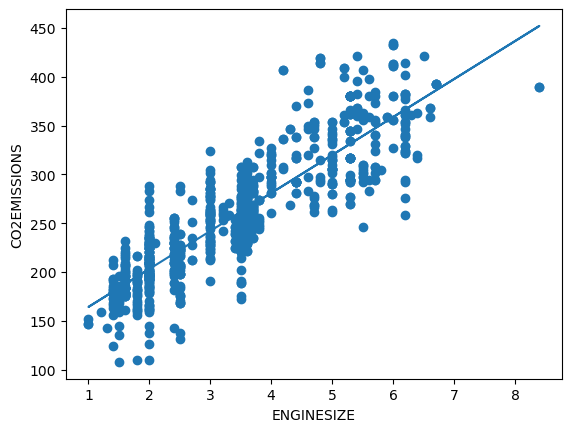

In [50]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0])
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

In [51]:
from sklearn.metrics import r2_score
# train and test are both similar data structures, they differ because when we use test, 
# the train data structure donot see our test and vice versa

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

# using %.2f converts the number into string with two decimal points, 
# if we do need it to be in float or int we can use round()
# since we just want to display the information we are using %.2f
print(f'Mean Absolute Error: {np.mean(np.absolute(test_y - test_y_)): .2f}')
print(f'Residual sum of squares (MSE): {np.mean((test_y - test_y_) ** 2): .2f}')
print(f'R2-score: {r2_score(test_y, test_y_)}')



Mean Absolute Error:  21.79
Residual sum of squares (MSE):  846.78
R2-score: 0.7680891570303912


In [52]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])

In [53]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

print('Coefficient: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficient:  [[15.99747161]]
Intercept:  [70.78983421]


Text(0, 0.5, 'CO2EMISSIONS')

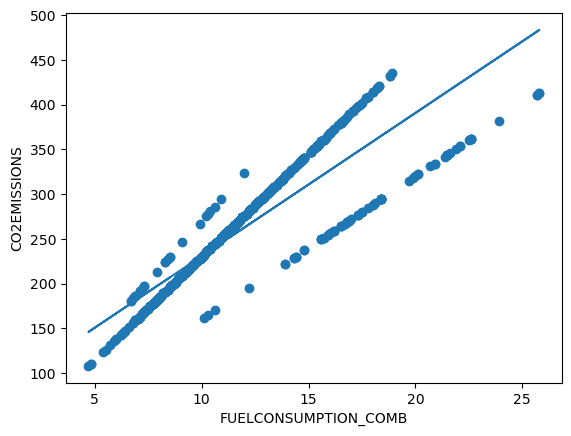

In [55]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS)
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0])
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')

In [57]:
test_y_ = regr.predict(test_x)

print(f'Mean Absolute Error: {np.mean(np.absolute(test_y_ - test_y)): .2f}')
print(f'Residual Sum of Square: {np.mean((test_y_ - test_y) ** 2): .2f}')
print(f'R2-score: {r2_score(test_y_, test_y): .2f}')

Mean Absolute Error:  18.06
Residual Sum of Square:  651.15
R2-score:  0.75
